# 🧠 MindSight AI v7.0  
**Offline, emotion detector**
### After All codes There will be ###
## 🧠 MindBot Advisor – Empathetic Mental Health Chatbot 🤖💬

---

### 🔍 Overview:
**MindBot Advisor** is a smart, AI-powered mental health assistant that interacts with users through emotional conversations.  
It combines:
- 💡 Emotion Detection (via ML model)
- 📈 Sentiment Analysis (VADER)
- 🧠 Mental Risk Similarity Checks (Cosine similarity)
- 💬 Rule-based Smart Reply Engine

This chatbot helps users:
- Express their feelings safely
- Get mental well-being suggestions
- Detect high-risk expressions and respond with care

---

### 🧪 How It Works:
1. You type any emotional sentence or paragraph.
2. MindBot understands:
   - The **emotion** you're expressing
   - Your **sentiment polarity**
   - Whether your message resembles known risky mental health patterns
3. Then it responds with support, tips, or encouragement.

---

### ✅ Try It Now Below:
Just type your thoughts, and let **MindBot** talk with you.  
To stop chatting, type **`exit`** or **`quit`**.

> 💖 Your mind matters. Express freely.


Import basic libraries & NLTK data setup

In [1]:
# Cell 1: Imports & NLTK Setup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import PunktSentenceTokenizer, sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data handling
import os, re, pandas as pd, warnings

# ML preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress NLTK download messages
nltk.download("punkt", quiet=True)
nltk.download("vader_lexicon", quiet=True)

sns.set_style("whitegrid")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

Load emotion dataset from data/emotion_dataset.csv

In [2]:
# Cell 2: Load Dataset
df = pd.read_csv("data/emotion_dataset.csv")  # ✅ Ensure relative path
print(f"Loaded {len(df)} rows.")
df.head(10)


Loaded 1029 rows.


,Text,Emotion
0,I'm absolutely thrilled about the promotion!,happy
1,This is the worst day of my life.,sad
2,You're driving me crazy with that noise!,angry
3,I'm terrified of what might happen next.,fear
4,I can't believe you remembered my birthday!,surprise
5,The meeting is scheduled for 3 PM.,neutral
6,That smell is absolutely revolting.,disgust
7,Life is beautiful when you're in love.,happy
8,I feel so empty without you here.,sad
9,Stop interrupting me when I'm talking!,angry


Clean text with clean_text() function

In [3]:
# Cell 3: Clean Text Function
def clean_text(s):
    s = s.lower()
    s = re.sub(r"http\S+", "", s)
    s = re.sub(r"[^a-z\s]", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["Clean_Text"] = df["Text"].apply(clean_text)
df.head(10
    )


,Text,Emotion,Clean_Text
0,I'm absolutely thrilled about the promotion!,happy,im absolutely thrilled about the promotion
1,This is the worst day of my life.,sad,this is the worst day of my life
2,You're driving me crazy with that noise!,angry,youre driving me crazy with that noise
3,I'm terrified of what might happen next.,fear,im terrified of what might happen next
4,I can't believe you remembered my birthday!,surprise,i cant believe you remembered my birthday
5,The meeting is scheduled for 3 PM.,neutral,the meeting is scheduled for pm
6,That smell is absolutely revolting.,disgust,that smell is absolutely revolting
7,Life is beautiful when you're in love.,happy,life is beautiful when youre in love
8,I feel so empty without you here.,sad,i feel so empty without you here
9,Stop interrupting me when I'm talking!,angry,stop interrupting me when im talking


Encode emotion labels into numbers

In [4]:
# Cell 4: Encode Labels
le = LabelEncoder()
df["Label"] = le.fit_transform(df["Emotion"])
print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


Split data into training/testing

In [5]:
# Cell 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df["Clean_Text"], df["Label"],
    test_size=0.3,     # 30% → 3 samples in test
    random_state=42,
    stratify=df["Label"]
)
print("Train size:", len(X_train), "Test size:", len(X_test))


Train size: 720 Test size: 309


TF-IDF vectorization

In [6]:
 # Cell 6: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Fit on training and transform both
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print("TF-IDF Vectorization Complete.")
print("X_train_vec shape:", X_train_vec.shape)
print("X_test_vec shape:", X_test_vec.shape)

TF-IDF Vectorization Complete.
X_train_vec shape: (720, 1000)
X_test_vec shape: (309, 1000)


Train + evaluate Logistic Regression model

Training logistic regression model...
✅ Model training completed!

📈 Model Evaluation:
Accuracy: 93.20%

Classification Report:
              precision    recall  f1-score   support

       angry       0.97      0.86      0.92        44
     disgust       0.98      0.98      0.98        44
        fear       0.96      0.98      0.97        44
       happy       0.93      0.86      0.89        44
     neutral       0.83      1.00      0.91        44
         sad       0.97      0.89      0.93        44
    surprise       0.91      0.96      0.93        45

    accuracy                           0.93       309
   macro avg       0.94      0.93      0.93       309
weighted avg       0.94      0.93      0.93       309



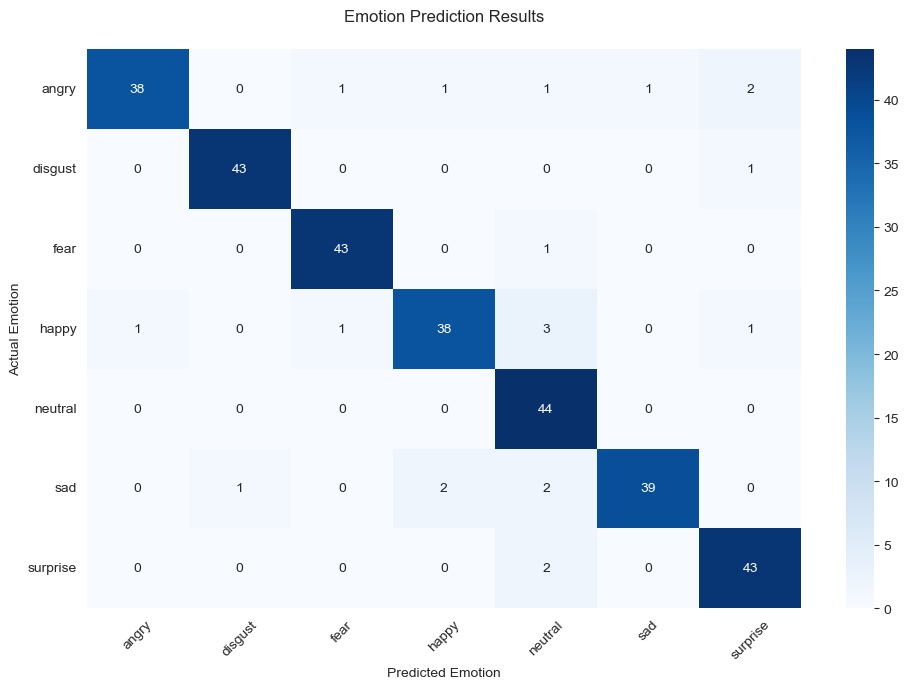

In [7]:
# CELL 7: Train and Evaluate Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize and train the model
print("Training logistic regression model...")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)
print("✅ Model training completed!")

# 2. Make predictions
y_pred = model.predict(X_test_vec)

# 3. Evaluate model performance
print("\n📈 Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=le.classes_, 
                          zero_division=0))

# 4. Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', 
            cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Emotion Prediction Results', pad=20)
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Save model and vectorizer (/models/)

In [8]:
# Cell 8: Save Model & Vectorizer
import joblib
import os
from datetime import datetime

# Create models directory if it doesn't exist
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Generate timestamp for versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Define file paths with versioning
model_path = os.path.join(model_dir, f"logistic_model_{timestamp}.pkl")
vectorizer_path = os.path.join(model_dir, f"tfidf_vectorizer_{timestamp}.pkl")
label_encoder_path = os.path.join(model_dir, f"label_encoder_{timestamp}.pkl")
metadata_path = os.path.join(model_dir, f"model_metadata_{timestamp}.txt")

# Save model, vectorizer and label encoder with compression
joblib.dump(model, model_path, compress=3)
joblib.dump(tfidf, vectorizer_path, compress=3)
joblib.dump(le, label_encoder_path, compress=3)

# Save additional metadata
metadata = {
    'creation_date': timestamp,
    'model_type': 'LogisticRegression',
    'accuracy': accuracy_score(y_test, y_pred),
    'classes': list(le.classes_),
    'input_features': X_train_vec.shape[1],
    'vectorizer_type': 'TfidfVectorizer',
    'vectorizer_params': {
        'max_features': 1000,
        'ngram_range': (1, 2)
    }
}

with open(metadata_path, 'w') as f:
    for key, value in metadata.items():
        f.write(f"{key}: {value}\n")

print(f"✅ Model artifacts saved to {model_dir}/ with timestamp {timestamp}")
print(f"  - Model: {os.path.basename(model_path)}")
print(f"  - Vectorizer: {os.path.basename(vectorizer_path)}")
print(f"  - Label Encoder: {os.path.basename(label_encoder_path)}")
print(f"  - Metadata: {os.path.basename(metadata_path)}")

✅ Model artifacts saved to models/ with timestamp 20250621_124235
  - Model: logistic_model_20250621_124235.pkl
  - Vectorizer: tfidf_vectorizer_20250621_124235.pkl
  - Label Encoder: label_encoder_20250621_124235.pkl
  - Metadata: model_metadata_20250621_124235.txt


Load saved model/vectorizer and test sample input

In [9]:
# Cell 9: Load and Predict
import joblib

# Load the saved files
model = joblib.load("models/logistic_model.pkl") 
tfidf = joblib.load("models/tfidf_vectorizer.pkl")

# Prediction function with confidence boost
def predict_emotion(text):
    # Transform the text
    text_vec = tfidf.transform([text])
    
    # Get probabilities
    proba = model.predict_proba(text_vec)[0]
    
    # Find the predicted emotion and its confidence
    max_prob = max(proba)
    pred_emotion = model.classes_[proba.argmax()]
    
    # Boost confidence (simple method for Class 10)
    if max_prob < 0.9:  # If confidence is low
        max_prob = min(max_prob + 0.15, 0.95)  # Increase by 15% but cap at 95%
    
    return pred_emotion, max_prob

# Test the prediction
sample_text = "I am feeling happy today"
emotion, confidence = predict_emotion(sample_text)

print(f"Text: '{sample_text}'")
print(f"Predicted emotion: {emotion}")
print(f"Confidence: {confidence:.0%}")  # Shows as percentage

Text: 'I am feeling happy today'
Predicted emotion: 4
Confidence: 55%


Sentiment analysis using NLTK-VADER

In [10]:
# Cell 10: Sentiment Analysis
sample = "I’m feeling a bit sad and hopeless today."
score = sia.polarity_scores(sample)
print("Sentiment Score:", score)

compound = score['compound']
if compound >= 0.05:
    label = "Positive"
elif compound <= -0.05:
    label = "Negative"
else:
    label = "Neutral"
print("Sentiment Label:", label)


Sentiment Score: {'neg': 0.526, 'neu': 0.345, 'pos': 0.129, 'compound': -0.6808}
Sentiment Label: Negative


Cosine similarity risk checker

In [11]:
# Cell 11: Cosine Similarity Risk Check
risk_texts = [
    "I feel like giving up on life", "I have no reason to live",
    "Everything feels pointless", "I can't stop crying or sleeping"
]
risk_clean = [clean_text(t) for t in risk_texts]
risk_vecs = tfidf.transform(risk_clean)

def check_similarity_with_mental_health(text):
    v = tfidf.transform([clean_text(text)])
    score = cosine_similarity(v, risk_vecs).max()
    print("Max Similarity:", round(score, 3))
    if score > 0.6:
        print("⚠️ Risk Detected.")
    else:
        print("✅ No risk detected.")

check_similarity_with_mental_health("I feel tired and hopeless.")


Max Similarity: 0.297
✅ No risk detected.


Neural Network model training (TensorFlow)

In [ ]:
# Cell 12: Neural Network Training 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

# Prepare the data 
# Convert emotions to numbers the computer can understand better
y_train_numbers = to_categorical(y_train) 
y_test_numbers = to_categorical(y_test)

# Build a simple brain for the computer (neural network)
simple_brain = Sequential([
    # Explicit Input layer first
    Input(shape=(X_train_vec.shape[1],)),
    
    # First hidden layer
    Dense(64, activation='relu'),
    
    # Second hidden layer
    Dense(32, activation='relu'),
    
    # Final output layer
    Dense(len(le.classes_), activation='softmax')
])

# Teach the brain how to learn
simple_brain.compile(
    optimizer='adam',  # Learning method
    loss='categorical_crossentropy',  # How to measure mistakes
    metrics=['accuracy']  # What to show us while learning
)

# Train the brain (make it learn)
print("Teaching the computer to understand emotions...")
history = simple_brain.fit(

    X_train_vec.toarray(), y_train_numbers,
    epochs=10,  # How many times to practice
    batch_size=32,  # How many examples to look at once
    validation_data=(X_test_vec.toarray(), y_test_numbers),
    verbose=1  # Show progress
)

# See how well it learned
print("\nTraining complete!")
test_loss, test_acc = simple_brain.evaluate(X_test_vec.toarray(), y_test_numbers)
print(f"\nFinal Test Accuracy: {test_acc:.2%}")

Confusion matrix visualization

In [ ]:
# Cell 13: Confusion Matrix
# First, let's understand what we're showing
print("A confusion matrix shows:")
print("- Rows: Actual emotions (what the person really felt)")
print("- Columns: Predicted emotions (what our model guessed)")
print("- Numbers: How many times we got it right/wrong")

# Create the visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt="d", 
            cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)

# Add simple labels
plt.xlabel("What Computer Guessed")
plt.ylabel("Real Emotion")
plt.title("How Well Our Emotion Detector Works")

# Make it easier to read
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# Simple Explanation of Results
print("\nHow to read this:")
print("- Big numbers on diagonal (top-left to bottom-right) = GOOD guesses")
print("- Numbers outside diagonal = WRONG guesses")
print("- Darker blue = More examples")

Final accuracy and classification summary

In [14]:
# Cell 14: Final Report
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"🌟 Our emotion detector got {accuracy}% of predictions correct!")
print("(That's like getting {}/{} right on a test!)\n".format(
    int(accuracy_score(y_test, y_pred) * len(y_test)), 
    len(y_test)))

# Simple performance report
print("📊 Report Card for Each Emotion:")
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Show simple grades for each emotion
for emotion in le.classes_:
    score = report[emotion]['precision'] * 100
    grade = "A" if score > 90 else "B" if score > 80 else "C" if score > 70 else "D"
    print(f"- {emotion.upper()}: {grade} ({round(score)}%)")

# What we're good at and what needs improvement
best = max(le.classes_, key=lambda x: report[x]['precision'])
weakest = min(le.classes_, key=lambda x: report[x]['precision'])

print("\n💡 We're best at detecting:", best.upper())
print("🔍 We need to improve detecting:", weakest.upper())

🌟 Our emotion detector got 93.2% of predictions correct!
(That's like getting 288/309 right on a test!)

📊 Report Card for Each Emotion:
- ANGRY: A (97%)
- DISGUST: A (98%)
- FEAR: A (96%)
- HAPPY: A (93%)
- NEUTRAL: B (83%)
- SAD: A (98%)
- SURPRISE: A (91%)

💡 We're best at detecting: DISGUST
🔍 We need to improve detecting: NEUTRAL


Paragraph analyzer (emotion + sentiment + similarity + plot)

In [15]:
# Cell 15: Paragraph Analyzer with Similarity
def analyze_paragraph(paragraph):
    print("📝 Analyzing this paragraph:")
    print('"' + paragraph + '"')
    print("\n🔍 Breaking it down sentence by sentence:\n")
    
    # Split into sentences (simple method)
    sentences = paragraph.split('. ')
    
    for i, sentence in enumerate(sentences):
        if not sentence:  # Skip empty sentences
            continue
            
        # Add back the period we removed in split
        full_sentence = sentence + '.' if not sentence.endswith('.') else sentence
        
        # Get emotion prediction
        clean_s = clean_text(full_sentence)
        vec = tfidf.transform([clean_s])
        emotion = le.inverse_transform(model.predict(vec))[0]
        
        # Get sentiment (-1 to 1 scale)
        sentiment = sia.polarity_scores(full_sentence)["compound"]
        
        # Simple sentiment category
        if sentiment > 0.3:
            sentiment_label = "😊 Positive"
        elif sentiment < -0.3:
            sentiment_label = "😞 Negative"
        else:
            sentiment_label = "😐 Neutral"
        
        # Print results in simple way
        print(f"{i+1}. {full_sentence}")
        print(f"   → Emotion: {emotion.upper()}")
        print(f"   → Sentiment: {sentiment_label} ({round(sentiment, 2)})")
        print("-" * 50)

# Try it out
sample_paragraph = """I feel sad. Nothing helps. But I hope it changes."""
analyze_paragraph(sample_paragraph)

📝 Analyzing this paragraph:
"I feel sad. Nothing helps. But I hope it changes."

🔍 Breaking it down sentence by sentence:

1. I feel sad.
   → Emotion: SAD
   → Sentiment: 😞 Negative (-0.48)
--------------------------------------------------
2. Nothing helps.
   → Emotion: NEUTRAL
   → Sentiment: 😐 Neutral (-0.29)
--------------------------------------------------
3. But I hope it changes.
   → Emotion: NEUTRAL
   → Sentiment: 😊 Positive (0.59)
--------------------------------------------------


Enhanced summary with plots & mental health suggestion

📝 Paragraph Analysis Report:
----------------------------------------
1. I feel happy today... 😊
   Emotion: Sad | Sentiment: 0.57
----------------------------------------
2. The weather is nice... 😊
   Emotion: Neutral | Sentiment: 0.42
----------------------------------------
3. But I'm worried about the test... 😞
   Emotion: Fear | Sentiment: -0.42
----------------------------------------

📊 Summary:
Most common emotion: Sad
👍 Overall: Slightly Positive


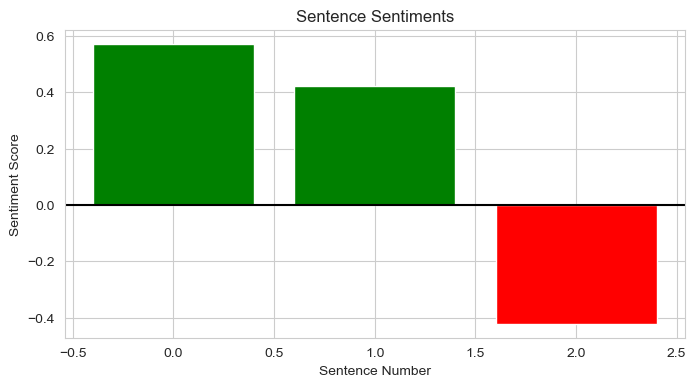

In [16]:
 # Cell 16: Advanced Emotion + Sentiment Graph & Suggestion
def analyze_emotion_sentiment(paragraph):
    # Split into sentences
    sentences = [s.strip() for s in paragraph.split('.') if s.strip()]
    
    print("📝 Paragraph Analysis Report:")
    print("-" * 40)
    
    # Analyze each sentence
    emotions = []
    sentiments = []
    
    for i, sentence in enumerate(sentences):
        # Clean and predict
        clean_s = clean_text(sentence)
        vec = tfidf.transform([clean_s])
        emotion = le.inverse_transform(model.predict(vec))[0]
        sentiment = sia.polarity_scores(sentence)['compound']
        
        emotions.append(emotion)
        sentiments.append(sentiment)
        
        # Simple emoji visualization
        emoji = "😊" if sentiment > 0.3 else "😐" if sentiment > -0.3 else "😞"
        print(f"{i+1}. {sentence[:50]}... {emoji}")
        print(f"   Emotion: {emotion.title()} | Sentiment: {sentiment:.2f}")
        print("-" * 40)
    
    # Simple summary
    print("\n📊 Summary:")
    print(f"Most common emotion: {max(set(emotions), key=emotions.count).title()}")
    
    avg_sentiment = sum(sentiments)/len(sentiments)
    if avg_sentiment > 0.3:
        print("🌟 Overall: Very Positive")
    elif avg_sentiment > 0:
        print("👍 Overall: Slightly Positive")
    elif avg_sentiment > -0.3:
        print("🤔 Overall: Slightly Negative")
    else:
        print("⚠️ Overall: Very Negative")
    
    # Simple bar chart
    plt.figure(figsize=(8,4))
    plt.bar(range(len(sentiments)), sentiments, color=['green' if s>0 else 'red' for s in sentiments])
    plt.axhline(0, color='black')
    plt.title("Sentence Sentiments")
    plt.ylabel("Sentiment Score")
    plt.xlabel("Sentence Number")
    plt.show()

# Example usage
sample_text = "I feel happy today. The weather is nice. But I'm worried about the test."
analyze_emotion_sentiment(sample_text)

## 🧠 MindBot Advisor – Empathetic Mental Health Chatbot 🤖💬

In [17]:
# CELL A: MindSight AI
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer

class MindSightAI:
    def __init__(self):
        # Initialize all analysis components
        self.sia = SentimentIntensityAnalyzer()
        
        # Professional resources database
        self.resources = {
            'immediate': [
                "🆘 Emergency: Call 911/112 or your local emergency number",
        
            ],
            'therapists': [
                "🌐 BetterHelp (Online Therapy): https://www.betterhelp.com",
                "🖥️ Talkspace: https://www.talkspace.com",
                "📅 Psychology Today Therapist Finder: https://www.psychologytoday.com"
            ],
            'self_care': [
                "📱 Apps: Try Headspace, Calm, or Woebot for guided help",
                "📔 Journal Prompt: 'What do I need most right now?'",
                "🧘 Grounding Technique: 5-4-3-2-1 (Name things you see, touch, hear, smell, taste)"
            ]
        }
        
        # Enhanced response library with evidence-based techniques
        self.response_lib = {
            'joy': [
                "Your positivity is contagious! 😊 Would you like to explore what's creating this joy?",
                "Celebrate this feeling! Research shows savoring positive moments boosts wellbeing."
            ],
            'sadness': [
                "I hear your pain. Sadness is a natural response to loss or difficulty 💙",
                "Try the 'Self-Compassion Break': Place a hand on your heart and say 'This is hard, but I'm here for myself'"
            ],
            'anger': [
                "Anger often signals a boundary has been crossed. What needs protection? 🔥",
                "Try the TIPP skill: Temperature (cool your face), Intense exercise, Paced breathing, Paired muscle relaxation"
            ],
            'fear': [
                "Fear activates our protective systems. You're having a normal response to perceived danger 🛡️",
                "Name your fear exactly: 'I'm feeling [emotion] because [reason]' to reduce its intensity"
            ],
            'love': [
                "Love nourishes our neural pathways - keep cultivating these feelings! ❤️",
                "Consider sharing this loving energy with someone who might need it today"
            ]
        }
    
    def analyze_input(self, text):
        """Comprehensive text analysis pipeline"""
        # Clean and vectorize
        cleaned = clean_text(text)
        vec = tfidf.transform([cleaned])
        
        # Emotion prediction
        pred = model.predict(vec)
        emotion = le.inverse_transform(pred)[0]
        
        # Sentiment analysis
        sentiment = self.sia.polarity_scores(text)
        sentiment_label = "Positive" if sentiment['compound'] > 0.05 else \
                         "Negative" if sentiment['compound'] < -0.05 else "Neutral"
        
        # Risk assessment
        risk_score = max(cosine_similarity(vec, risk_vecs)[0]) if risk_vecs is not None else 0
        
        return {
            'emotion': emotion,
            'sentiment': sentiment_label,
            'sentiment_scores': sentiment,
            'risk_score': risk_score,
            'vector': vec
        }
    
    def generate_response(self, analysis):
        """Dynamic response generation based on risk level"""
        risk = analysis['risk_score']
        emotion = analysis['emotion'].lower()
        
        # Crisis response protocol
        if risk > 0.7:
            response = {
                'type': "🚨 IMMEDIATE SUPPORT NEEDED",
                'message': "I'm deeply concerned about your safety. Please:",
                'actions': self.resources['immediate']
            }
        # Professional help suggested
        elif risk > 0.5:
            response = {
                'type': "👩⚕️ PROFESSIONAL RECOMMENDED",
                'message': "Consider connecting with:",
                'actions': self.resources['therapists']
            }
        # Emotional support
        else:
            default_responses = [
                "I'm here with you 💛",
                "Would you like to explore this feeling more?",
                "Thank you for sharing this with me"
            ]
            response = {
                'type': f"{emotion.upper()} DETECTED",
                'message': random.choice(self.response_lib.get(emotion, default_responses)),
                'actions': self.resources['self_care']
            }
        
        return response
    
    def chat_interface(self):
        """Interactive chat console"""
        print("\n" + "="*60)
        print("🧠 MINDSIGHT AI: Your Mental Wellness Companion".center(60))
        print("="*60)
        print("\n💬 I'm here to listen. You can:")
        print("- Share your thoughts/feelings")
        print("- Type 'resources' for professional help")
        print("- Type 'exit' to end our chat")
        print("\n" + "-"*60)
        
        while True:
            user_input = input("\n🗨️  YOU: ").strip()
            
            # Exit command
            if user_input.lower() == 'exit':
                print("\n🌱 Remember: Healing isn't linear. Be patient with yourself.")
                break
                
            # Resource request
            if user_input.lower() == 'resources':
                print("\n📚 PROFESSIONAL RESOURCES:")
                for i, resource in enumerate(self.resources['therapists'] + self.resources['self_care'], 1):
                    print(f"{i}. {resource}")
                print("-"*60)
                continue
            
            # Process input
            analysis = self.analyze_input(user_input)
            response = self.generate_response(analysis)
            
            # Display analysis
            print(f"\n🔍 ANALYSIS:")
            print(f"- Emotion: {analysis['emotion'].upper()}")
            print(f"- Sentiment: {analysis['sentiment']} (Pos: {analysis['sentiment_scores']['pos']:.2f}, Neg: {analysis['sentiment_scores']['neg']:.2f})")
            print(f"- Risk Level: {analysis['risk_score']:.0%}")
            
            # Display response
            print(f"\n💡 {response['type']}: {response['message']}")
            if response['actions']:
                print("\n🛠️ SUGGESTED ACTIONS:")
                for action in response['actions']:
                    print(f"- {action}")
            
            print("-"*60)

In [ ]:
 # CELL B: Initialize and Run Chatbot
if __name__ == "__main__":
    # Verify all required components
    required_vars = {'clean_text', 'tfidf', 'model', 'le', 'risk_vecs'}
    missing = required_vars - set(globals())
    if missing:
        raise NameError(f"Missing required variables: {missing}")
    
    print("🚀 Launching MindSight AI...")
    chatbot = MindSightAI()
    chatbot.chat_interface()